## 5. Domains and coordinate reference systems

**earthkit-plots** makes it simple and convenient to produce maps over any geospatial extent, using whichever map projection works best for your data.

This section covers some of the convenience features provided by **earthkit-plots** for quickly plotting maps over specific domains, including:
- Built-in named domains
- Combining multiple domains
- Automatic projection selection based on domain extents
- Creating new, custom, named domains.

### Named domains

The most strightforward way of specifying a map domain is through passing a named domain via the `domain` argument to the `Map` class, or to the `Figure.add_map()` method. The valid named domains that can be used with earthkit-plots include:
- Named countries which exist in [Natural Earth's Admin 0 countries dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/), e.g. `"France"`
- Continents, e.g. `"Africa"`
- A named domain packaged up with your style library of choice (see builtin domain for a list of named domains included in the default earthkit-plots distribution)
- `None` (default), which will make your map use the domain and projection of the **first** data that you plot on it (or global equirectangular if no data is plotted).

<div class="alert alert-block alert-info">
<strong>NOTE: </strong> The <code>domain</code> argument is also a valid argument to all <code>quickmap</code> functions, so you can still specify domains in exactly the same way as in these examples if you are using the <code>quickmap</code> module - e.g. <code>qmap.plot(data, domain="Europe")</code>.
</div>

Named domains will also come with their own default *coordinate reference system*, designed to optimise the map projection of the given domain. In the following examples, we have included in each plot title both the name of the domain and its coordinate refence system to help demonstrate this more clearly. Note that you can use the magic format strings `{domain}` and `{crs}` in plot titles to automatic extract this information!

This first example demonstrates producing a plot over Europe:

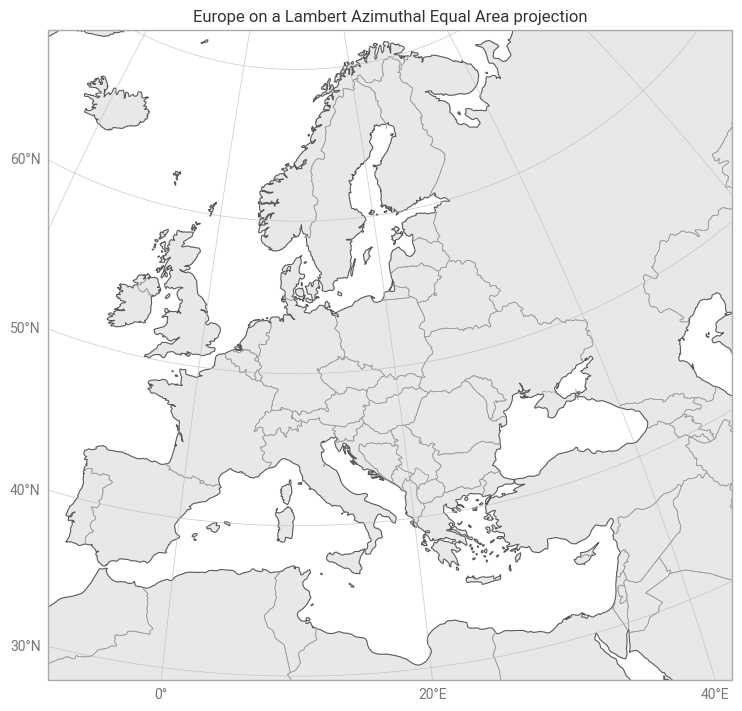

In [2]:
import earthkit as ek

chart = ek.plots.Map(domain="Europe")

# Convenient way to add land, coastlines, borders & gridlines
chart.standard_layers()

# Domains & CRSs can be included in title templates
chart.title("{domain} on a {crs} projection")

chart.show()

You can also **combine** different named domains by passing a list of names as the `domain` argument.

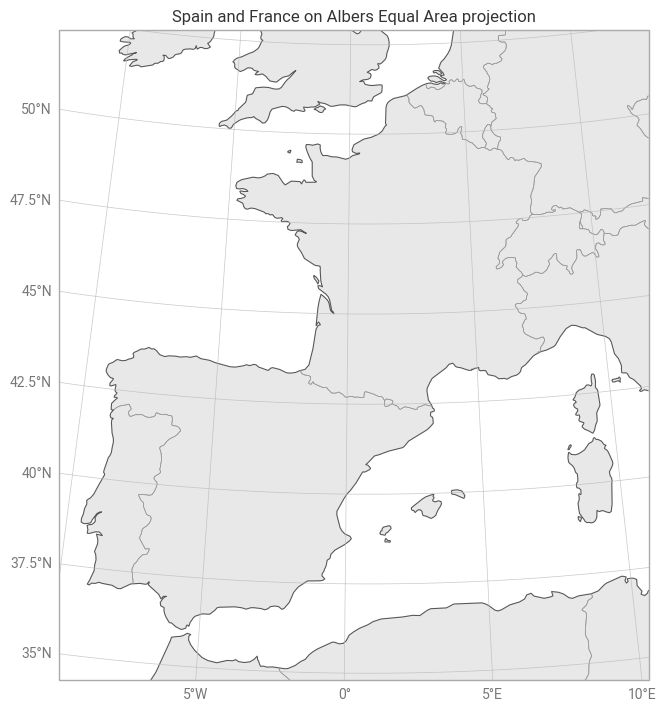

In [3]:
chart = ek.plots.Map(domain=["Spain", "France"])
chart.standard_layers()
chart.title("{domain} on {crs} projection")
chart.show()

### User-specified domains

You can of course also specify your own custom domains. The easiest way to do this is by passing a list of latitude-longitude extents as the `domain` argument, in the order `[longitude_min, longitude_max, latitude_min, latitude_max]`. Notice that by default, earthkit-plots will attempt to find the best projection for your custom domain - we'll explore how to specify your own projections in the next part of this tutorial.

By default, a custom domain specified as a list of extents will format to a list of latitud and longitude extremes in a plot title.

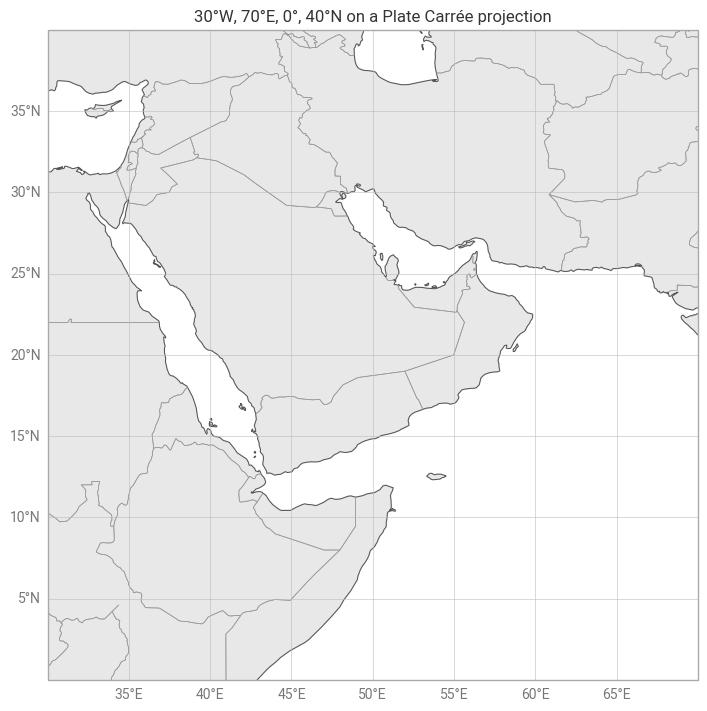

In [4]:
chart = ek.plots.Map(domain=[30, 70, 0, 40])
chart.standard_layers()
chart.title("{domain} on a {crs} projection")
chart.show()

### Coordinate reference systems

In all of the previous examples in this notebook, we have used the default coordinate reference system provided by earthkit plots, for both named domains and custom domains. We can make use of `cartopy` to provide configurable coordinate reference system if we would like to customise our plots further.

Let's reproduce the Europe example above, but use a `NorthPolarStereo` CRS from cartopy instead of the default `LambertAzimuthalEqualArea`:

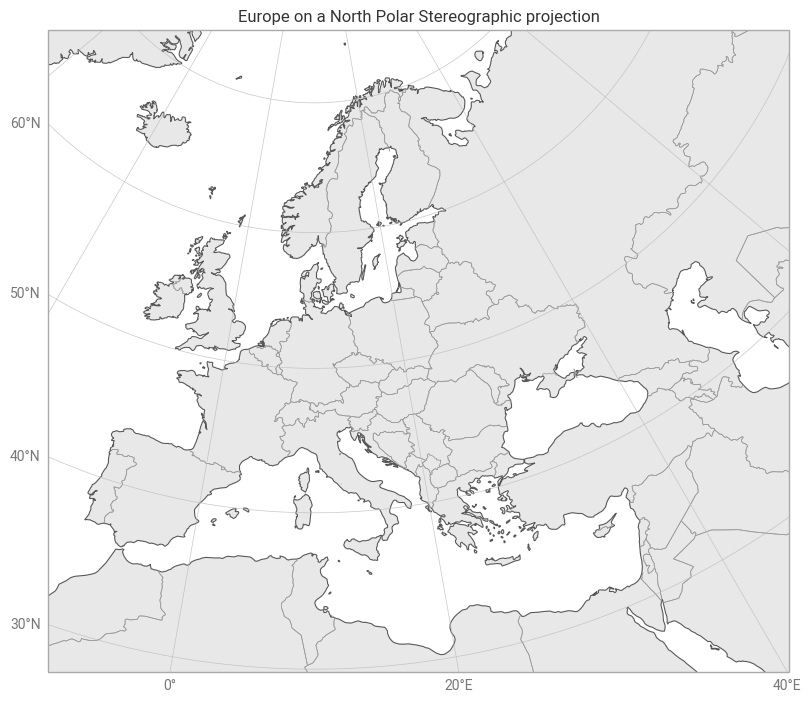

In [5]:
import cartopy.crs as ccrs

crs = ccrs.NorthPolarStereo(central_longitude=10)

chart = ek.plots.Map(domain="Europe", crs=crs)

chart.coastlines()
chart.borders()
chart.gridlines()
chart.land()

chart.title("{domain} on a {crs} projection")
chart.show()

You can combine the `crs` argument with any `domain` argument - even when using `quickmap`!

### More complex domains

Sometimes you might find that you need to do something a bit more complex with domains, like specifying the extents in CRS coordinates rather than latitudes and longitudes. Under-the-hood, earthkit-plots makes use of a `Domain` class, which can be built manually and used as another option for the `domain` argument to the map constructor.

Here's an example of creating a custom, named domain for Antarctica, with the extents defined in the coordinates of the South Polar Stereographic coordinate reference system.

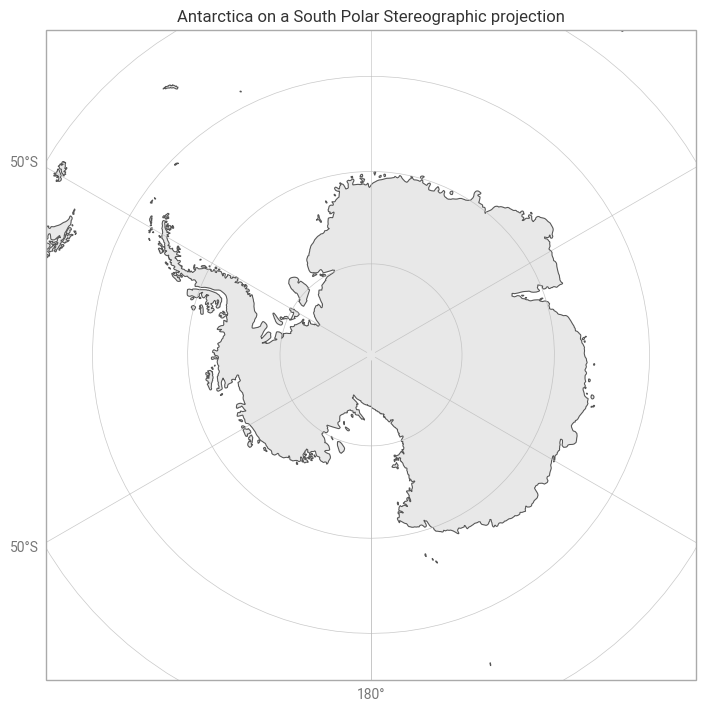

In [6]:
antarctic_domain = ek.plots.geo.domains.Domain(
    [-4000000, 4000000, -4000000, 4000000],
    crs=ccrs.SouthPolarStereo(),
    name="Antarctica",
)

chart = ek.plots.Map(domain=antarctic_domain)
chart.land()
chart.coastlines()
chart.gridlines()

chart.title("{domain} on a {crs} projection")
chart.show()

### Plotting on different projections

If you have a dataset with rich, well-formatted metadata, **earthkit-plots** should be able to infer the original coordinate system of your data, and will by default plot the data on its *native* coordinate system.

In [26]:
efas = ek.data.from_source("file", "/Users/macw/git/earthkit-plots/data/dis.grib")
efas.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,dis06,surface,0,20250213,0,0-6,fc,None,regular_ll
1,ecmf,dis06,surface,0,20250213,0,6-12,fc,None,regular_ll
2,ecmf,dis06,surface,0,20250213,0,12-18,fc,None,regular_ll
3,ecmf,dis06,surface,0,20250213,0,18-24,fc,None,regular_ll
4,ecmf,dis06,surface,0,20250213,0,24-30,fc,None,regular_ll
5,ecmf,dis06,surface,0,20250213,0,30-36,fc,None,regular_ll
6,ecmf,dis06,surface,0,20250213,0,36-42,fc,None,regular_ll
7,ecmf,dis06,surface,0,20250213,0,42-48,fc,None,regular_ll
8,ecmf,dis06,surface,0,20250213,0,48-54,fc,None,regular_ll
9,ecmf,dis06,surface,0,20250213,0,54-60,fc,None,regular_ll


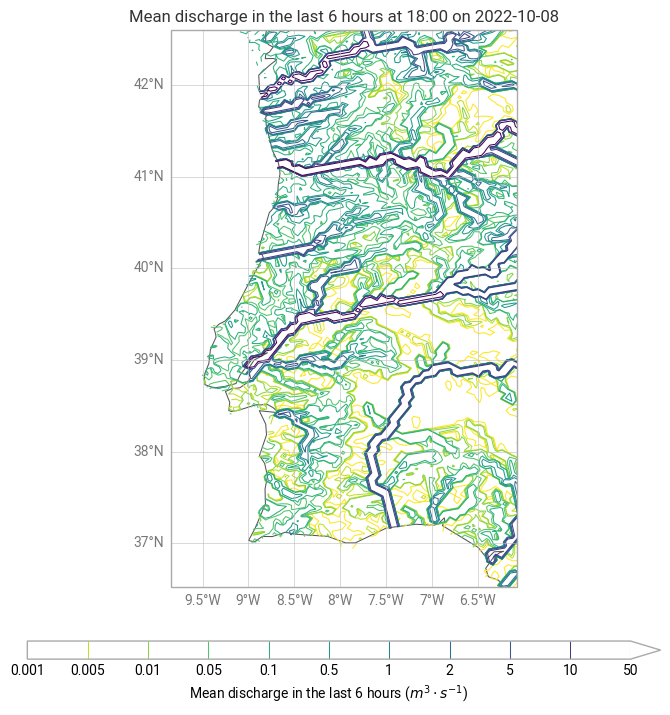

In [ ]:
# style = {
#     "type": "Style",
#     "colors": "Blues",
#     "levels": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 50],
#     "extend": "max",
#     "units": "m3 s-1",
# }
# style = ek.plots.styles.Style(
#     colors="Blues",
#     levels=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 50],
#     extend="max",
#     units="m3 s-1",
# )

# style_options = {
#     "type": "Style",
#     "colors": "turbo",
#     "levels": "range(0, 16, 2)",
#     "units": "m s-1",
#     "resample": {
#         "resample_type": "regrid",
#         "n": 20
#     }
# }
ek.plots.quickplot(efas.sel(variable="dis06"), domain="Portugal", style=style).show()

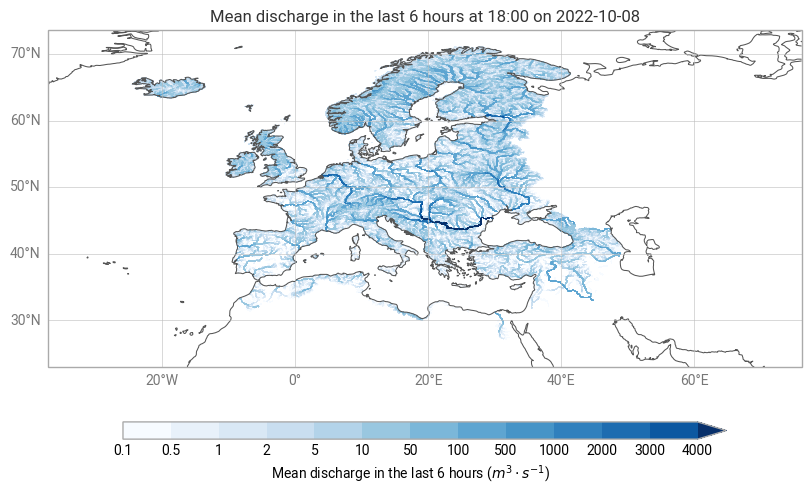

In [9]:
ek.plots.quickplot(efas.sel(variable="dis06"), crs=ccrs.PlateCarree()).show()

### What's next?

The next (and final) section of the user guide explores how to combine all of the features we've covered so far in order to write concise, **re-usable** code to greatly speed up your visualisation workflow.